# 深さ優先探索 (DFS)

グラフの探索手法の1つ。グラフのあるノードから開始し、まだ訪れたことのない隣接ノードを1つ選んで移動し続ける。隣接ノードを選べなくなったら、選べるノードまで戻って探索を続ける。  
状態遷移図の探索 (状態の全列挙など) や入れ子構造の探索に向いている。

説明のため、次のグラフを用いる。

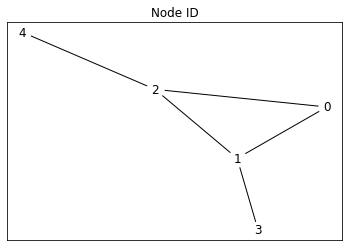

In [ ]:
import numpy
import networkx as nx
from networkx.generators.small import *
import matplotlib.pyplot as plt

G = bull_graph()
N = len(G)
numpy.random.seed(3)
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos, with_labels=True, node_color='w')
ax = plt.title("Node ID")

## 探索経路

DFSでは経路上の行き止まりまで到達すると、元来た道を戻る移動 (バックトラック) が発生する。  
隣接ノード間の移動時間を1として、ノードごとに入時刻と出時刻を記録しておくことで、探索経路を再現することができる。

In [2]:
def bfs(N, G, start=0):
    t_in = [-1 for i in range(N)]
    t_out = [-1 for i in range(N)]

    def _bfs(u, t=0):
        t_in[u] = t
        for v in G[u]:
            if t_in[v] < 0:
                t = _bfs(v, t+1)+1
        t_out[u] = t
        return t
    
    _bfs(start)
    return t_in, t_out

In [3]:
t_in, t_out = bfs(N, G, 0)

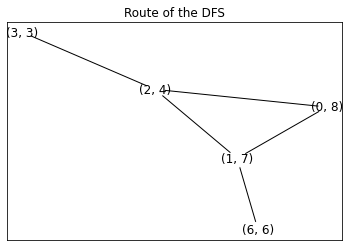

In [4]:
labels = dict()
for i, (t0, t1) in enumerate(zip(t_in, t_out)):
    labels[i] = "(%d, %d)" % (t0, t1)

nx.draw_networkx(G, pos, with_labels=True, labels=labels, node_color="w")
ax = plt.title("Route of the DFS")

`t_in` を小さい順に辿ると、ノードの行きがけ順を得ることができる。  
`t_out`を小さい順に辿ると帰りがけ順になる。

In [5]:
print(sorted(range(N), key=lambda x: t_in[x]))
print(sorted(range(N), key=lambda x: t_out[x]))

[0, 1, 2, 4, 3]
[4, 2, 3, 1, 0]
